<a href="https://colab.research.google.com/github/sr030529/KIDNEY-STONE/blob/main/PCA_kidneystone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [2]:
!pip install pycaret==3.0.0


  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.2.0
    Uninstalling pycaret-3.2.0:
      Successfully uninstalled pycaret-3.2.0


**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification.
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sr030529/KIDNEY-STONE/main/kidney-stone-dataset.csv')
df.head(25)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0
5,5,1.020,5.27,668,25.3,252,3.34,0
6,6,1.012,5.62,461,17.4,195,1.40,0
7,7,1.029,5.67,1107,35.9,550,8.48,0
8,8,1.015,5.41,543,21.9,170,1.16,0
9,9,1.021,6.13,779,25.7,382,2.21,0


In [6]:
len(df.index)

90

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item
2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item



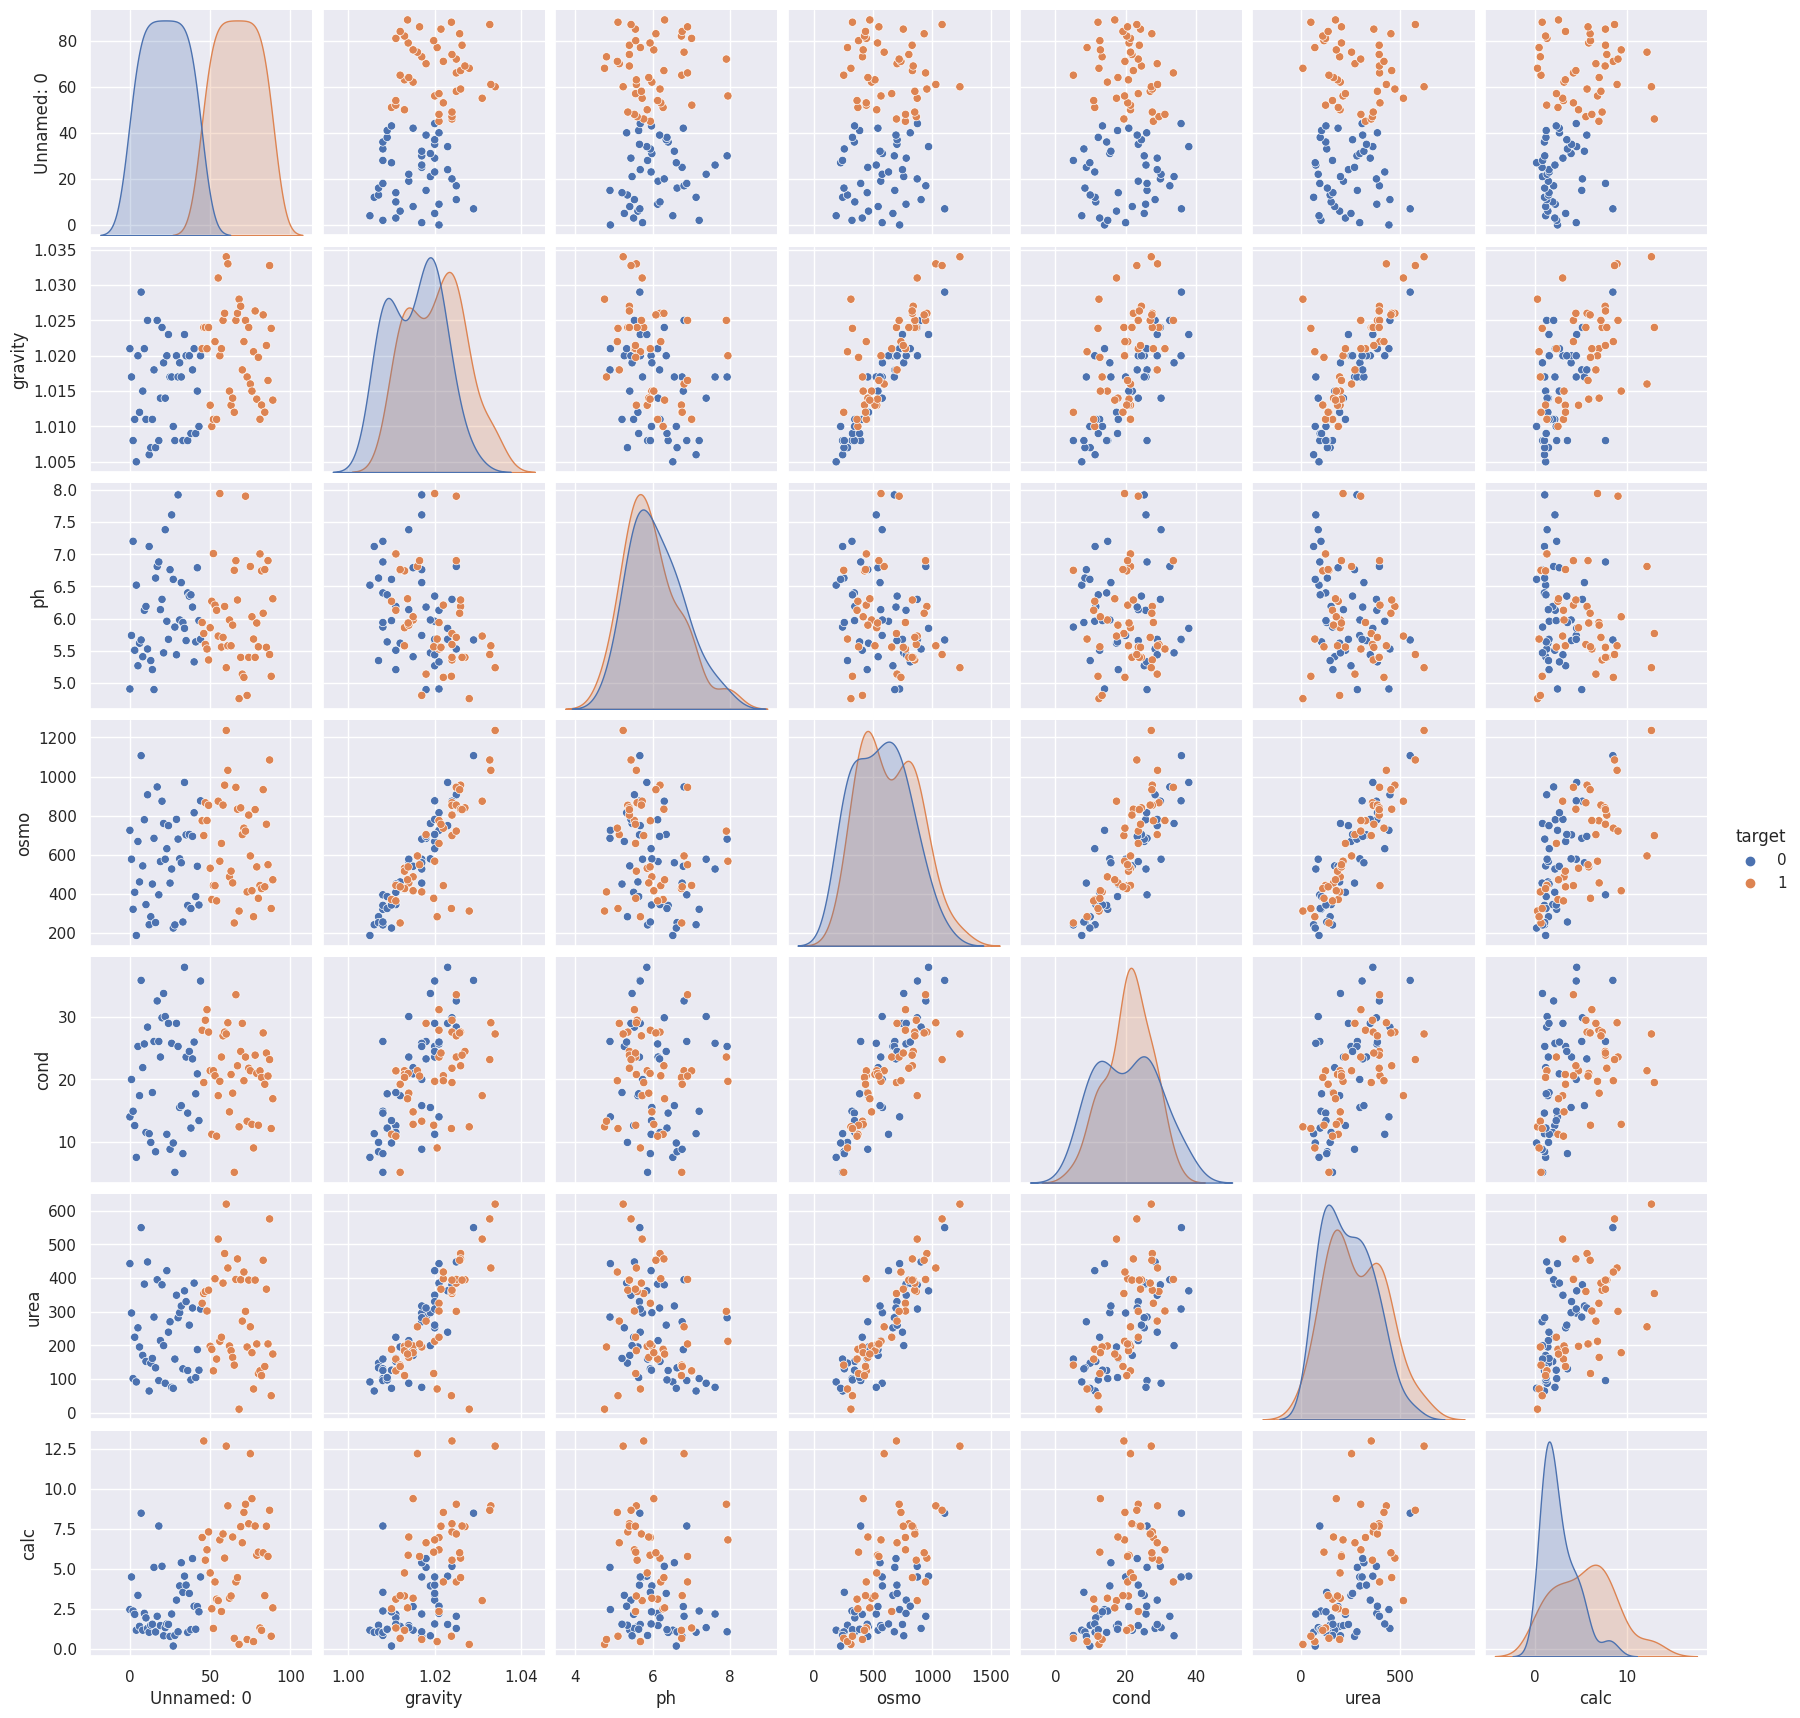

In [10]:
sns.pairplot(df, hue='target')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


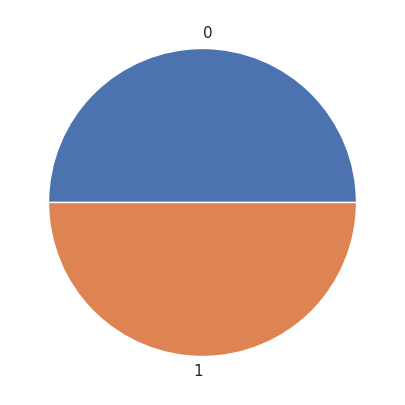

In [12]:
y =df['target']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [13]:
X = df.drop(columns=['target'])
X.head(10)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc
0,0,1.021,4.91,725,14.0,443,2.45
1,1,1.017,5.74,577,20.0,296,4.49
2,2,1.008,7.20,321,14.9,101,2.36
3,3,1.011,5.51,408,12.6,224,2.15
4,4,1.005,6.52,187,7.5,91,1.16
5,5,1.020,5.27,668,25.3,252,3.34
6,6,1.012,5.62,461,17.4,195,1.40
7,7,1.029,5.67,1107,35.9,550,8.48
8,8,1.015,5.41,543,21.9,170,1.16
9,9,1.021,6.13,779,25.7,382,2.21


In [14]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90.0,44.500000,26.124701,0.000,22.250000,44.500000,66.750000,89.000
gravity,90.0,1.017952,0.006780,1.005,1.012258,1.018000,1.023000,1.034
ph,90.0,6.036651,0.711801,4.760,5.536520,5.936247,6.490000,7.940
osmo,90.0,602.333333,238.459805,187.000,411.500000,572.000000,778.000000,1236.000
cond,90.0,20.621687,7.654448,5.100,14.150000,21.177172,26.075000,38.000
urea,90.0,258.200000,135.381127,10.000,148.250000,231.500000,366.250000,620.000
calc,90.0,4.017788,3.016273,0.170,1.412500,3.230000,5.965127,13.000


**Standardize the Data**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc
0,-1.712912,0.452076,-1.591684,0.517294,-0.869923,1.372682,-0.522688
1,-1.674419,-0.141167,-0.419096,-0.106833,-0.081674,0.280776,0.157432
2,-1.635927,-1.475961,1.643530,-1.186403,-0.751686,-1.167671,-0.552694
3,-1.597434,-1.031030,-0.744030,-0.819518,-1.053848,-0.254035,-0.622706
4,-1.558942,-1.920893,0.682855,-1.751491,-1.723860,-1.241951,-0.952765
5,-1.520450,0.303765,-1.083092,0.276921,0.614613,-0.046053,-0.225969
6,-1.481957,-0.882719,-0.588627,-0.596013,-0.423249,-0.469446,-0.872750
7,-1.443465,1.638560,-0.517989,2.128216,2.007187,2.167472,1.487667
8,-1.404972,-0.437788,-0.885306,-0.250213,0.167938,-0.655144,-0.952765
9,-1.366480,0.452076,0.131880,0.745016,0.667163,0.919578,-0.602703


In [16]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90.0,1.480297e-17,1.005602,-1.712912,-0.856456,0.000000,0.856456,1.712912
gravity,90.0,-1.808430e-15,1.005602,-1.920893,-0.844431,0.007144,0.748697,2.380113
ph,90.0,4.638265e-16,1.005602,-1.803598,-0.706563,-0.141847,0.640472,2.688971
osmo,90.0,-1.813364e-16,1.005602,-1.751491,-0.804758,-0.127918,0.740799,2.672218
cond,90.0,-5.144033e-16,1.005602,-2.039160,-0.850217,0.072977,0.716428,2.283074
urea,90.0,1.097887e-16,1.005602,-1.843614,-0.816702,-0.198326,0.802588,2.687427
calc,90.0,-1.134895e-16,1.005602,-1.282823,-0.868583,-0.262642,0.649228,2.994601


**Observations and variables**

In [17]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

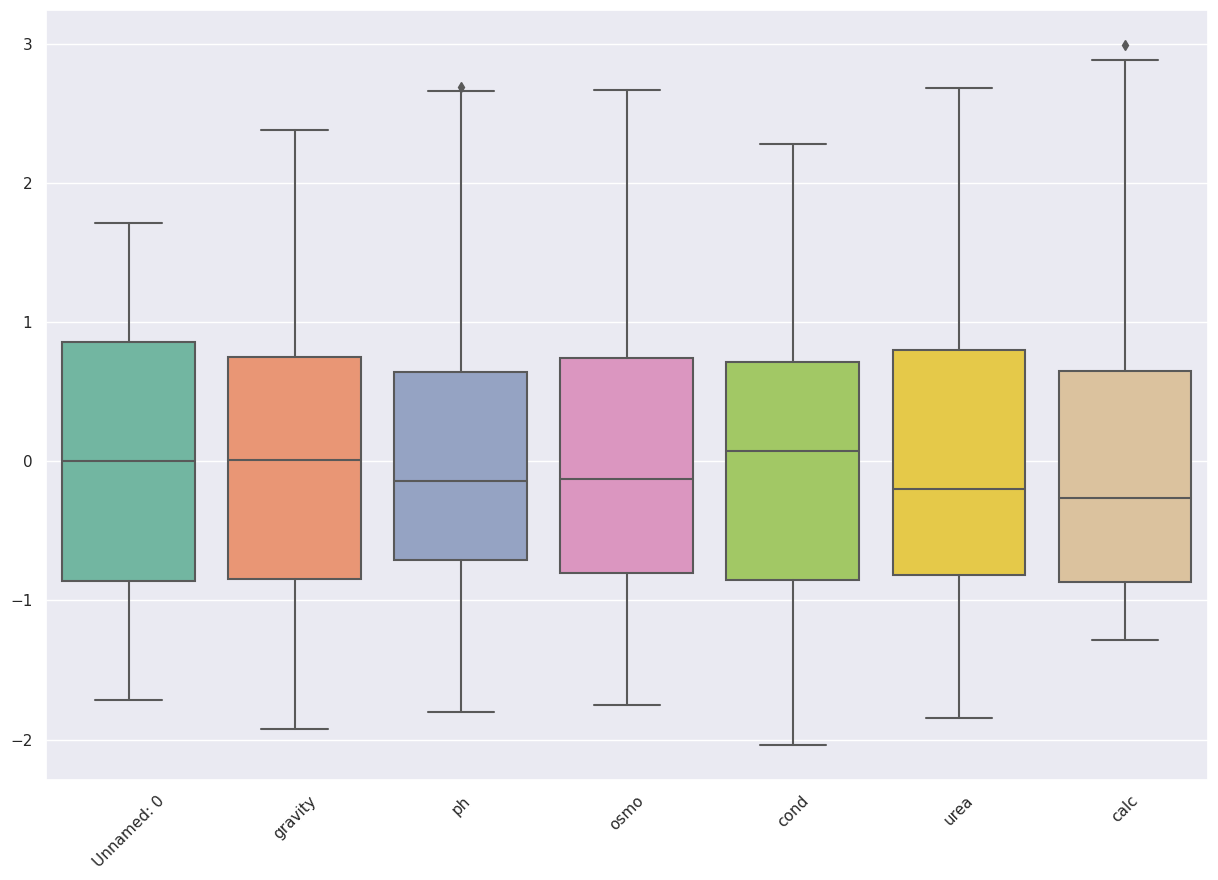

In [18]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


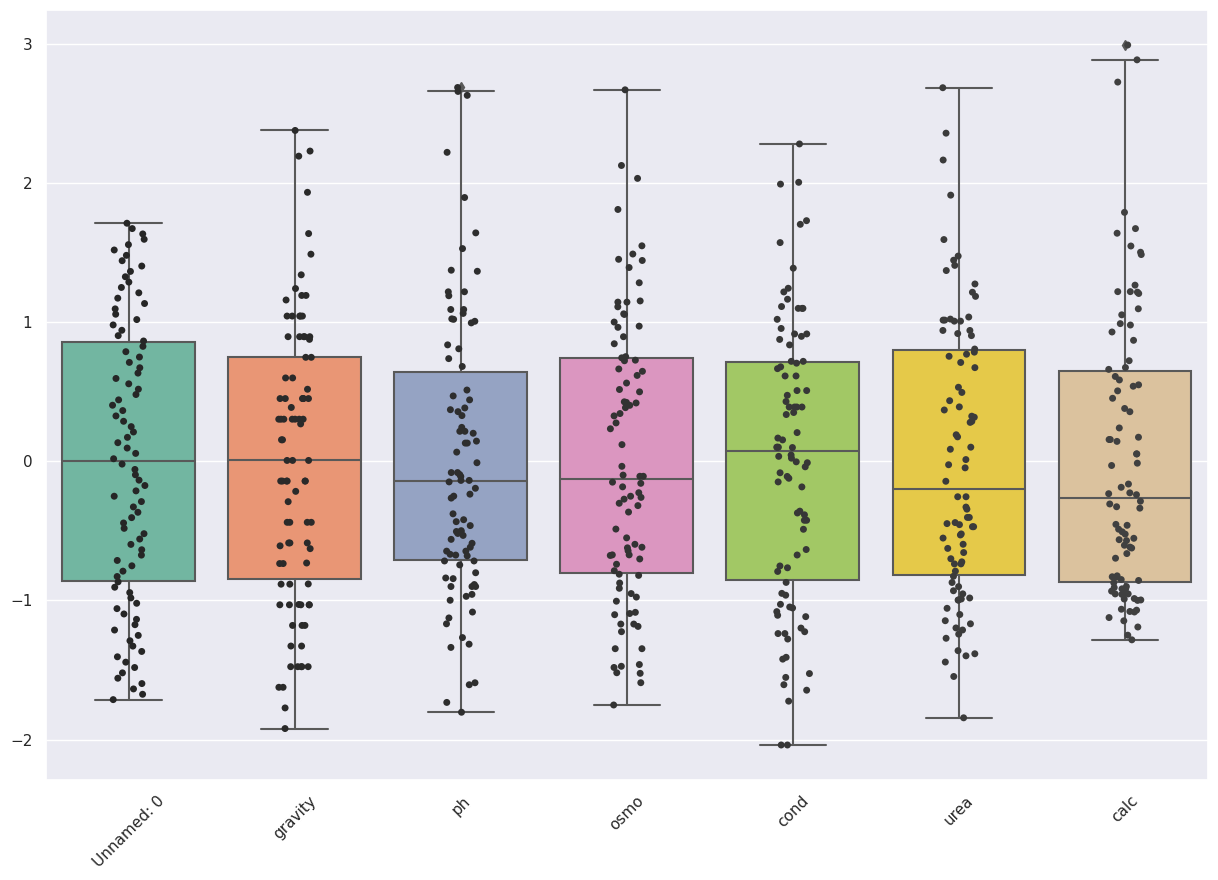

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

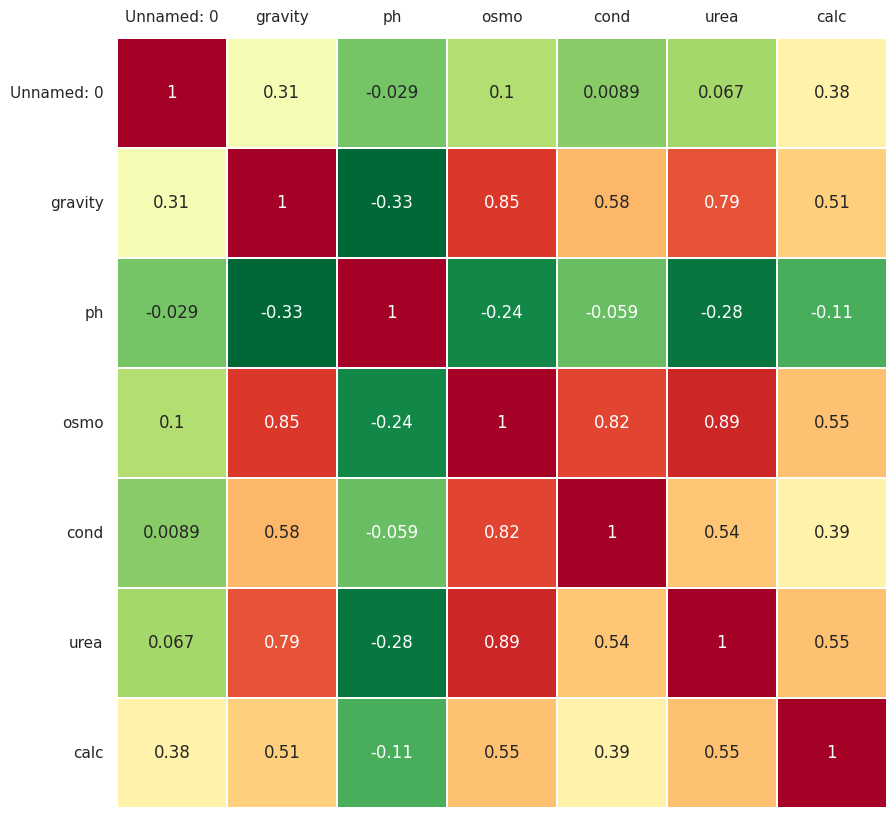

In [20]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

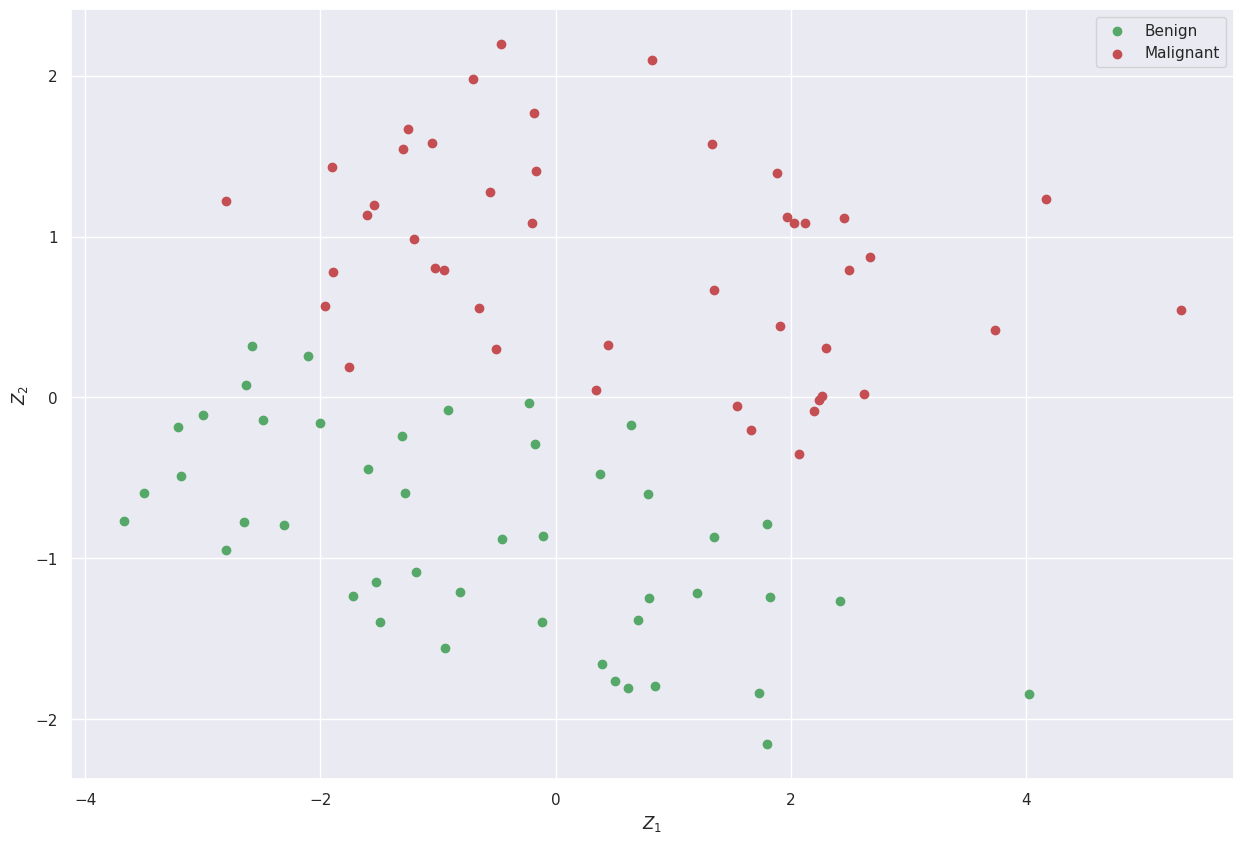

In [21]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 1.34007932e-01,  8.45964396e-01, -1.91205397e-02,
        -4.28474009e-01, -6.96315492e-04, -2.87002176e-01,
         7.73363248e-03],
       [ 4.65257899e-01,  5.20964165e-02, -1.01858891e-01,
        -2.40472671e-01,  3.76913615e-01,  7.39788995e-01,
         1.52535507e-01],
       [-1.69407465e-01,  8.54132101e-02,  9.20499913e-01,
         2.90729888e-02,  3.33673468e-01,  6.70768015e-02,
        -1.75666263e-03],
       [ 4.96703212e-01, -1.77301663e-01,  1.04825549e-01,
        -9.83830751e-02,  4.74164971e-02, -1.72950261e-01,
        -8.17937832e-01],
       [ 3.88251195e-01, -2.74251902e-01,  3.37090683e-01,
        -3.83913128e-01, -6.14153477e-01, -6.51354196e-02,
         3.62767650e-01],
       [ 4.60948530e-01, -1.41974958e-01, -4.56315366e-02,
         2.36961114e-01,  4.87142869e-01, -5.43858289e-01,
         4.19579247e-01],
       [ 3.56302474e-01,  3.84093625e-01,  1.23443591e-01,
         7.37915030e-01, -3.60356305e-01,  1.89489953e-01,
        -7.8408542

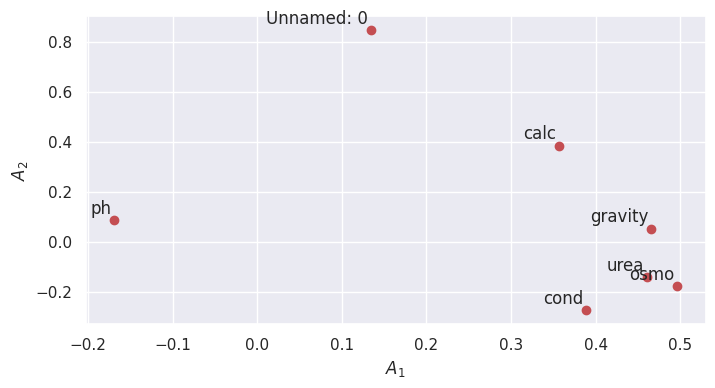

In [22]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


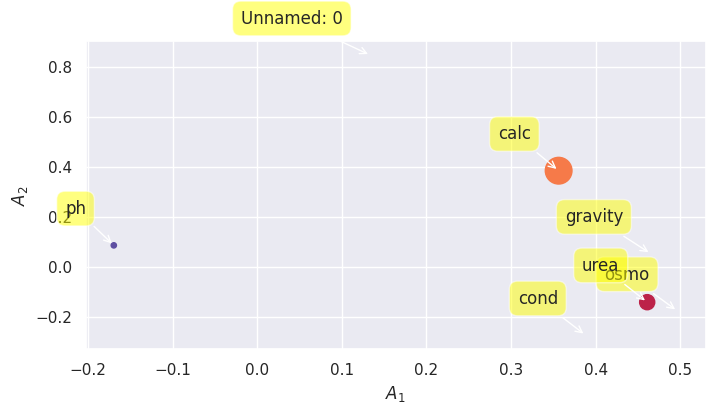

In [23]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([3.80912934, 1.16693889, 0.99853362, 0.51586423, 0.41496408,
       0.15333989, 0.01988165])

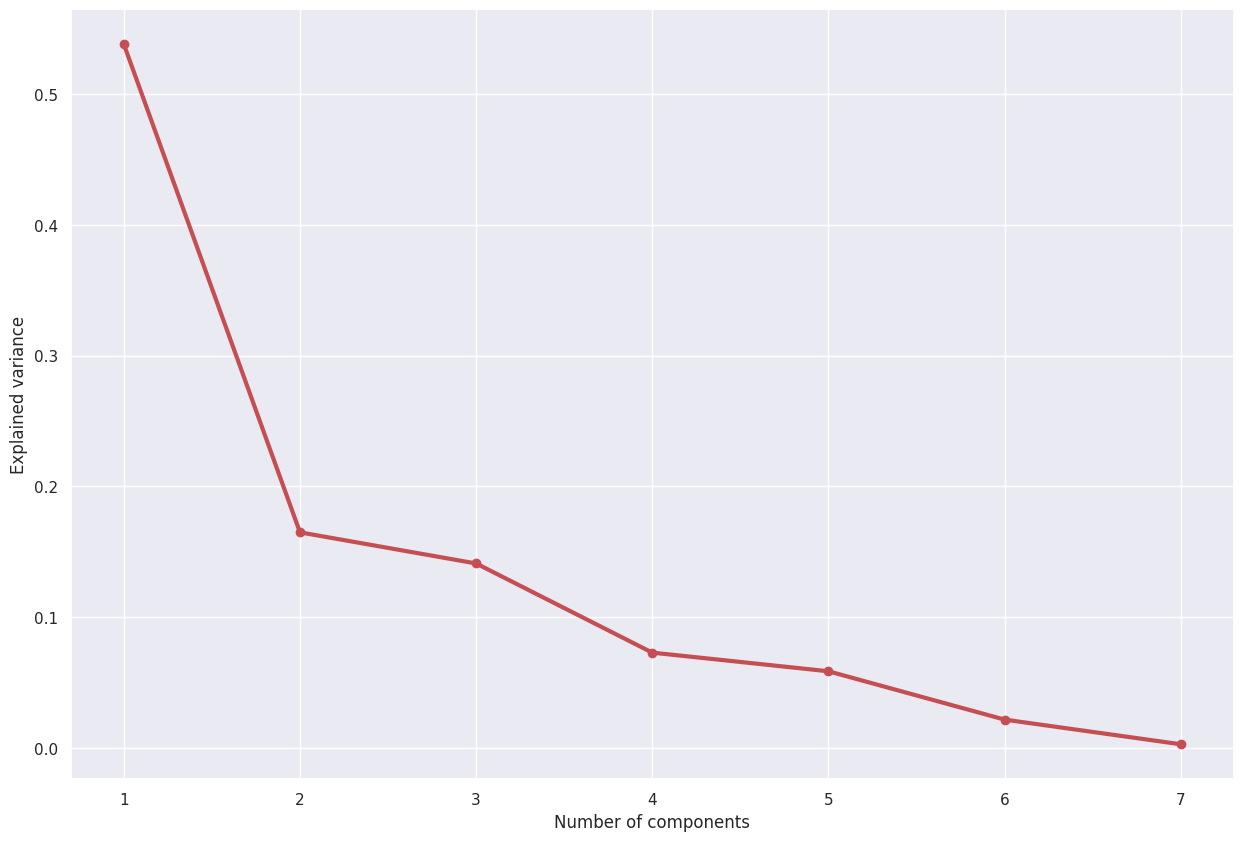

In [24]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

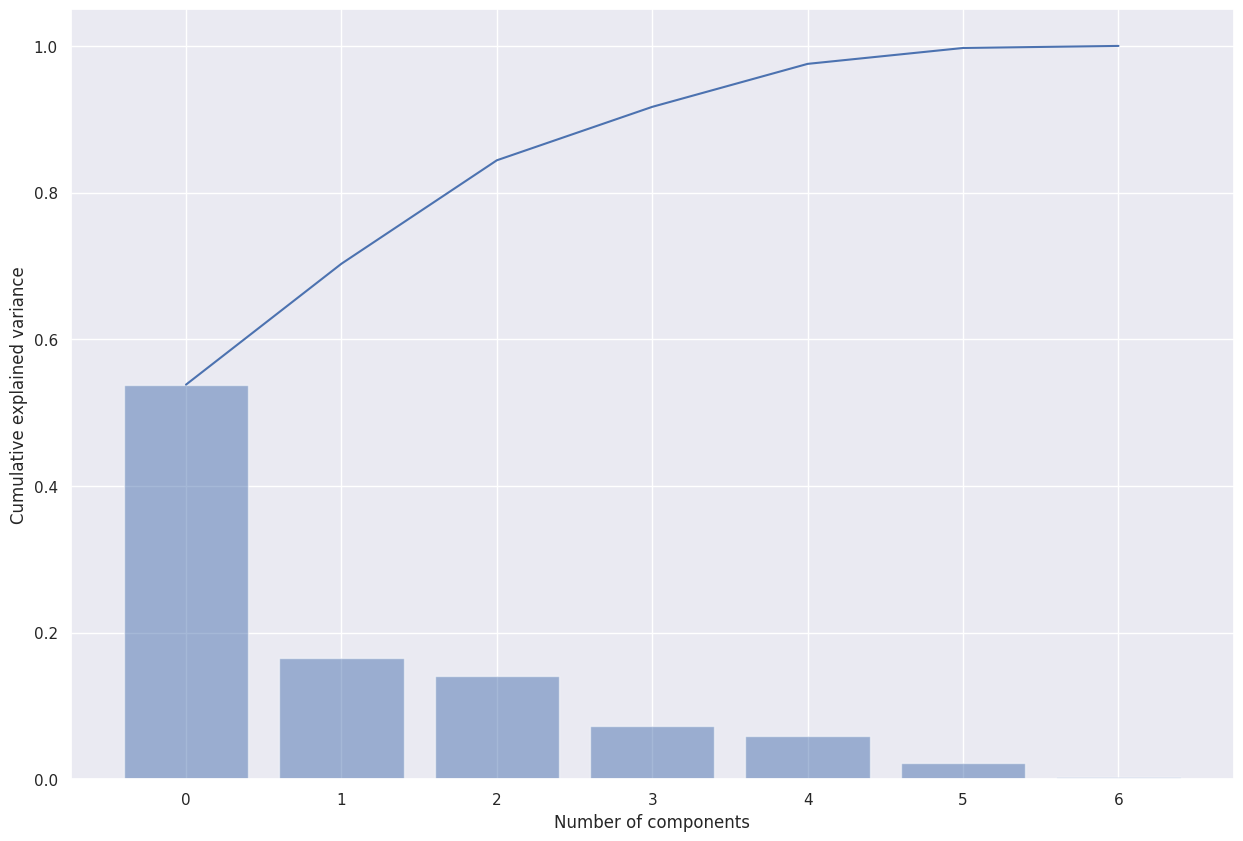

In [25]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-1.81024835, -1.39770327, -0.95045238, -1.23742458, -0.7668669 ,
       -1.66084374, -1.3967635 , -1.84413392, -1.56161156, -1.79829224,
       -0.79293239, -2.15761926, -0.59244379, -0.777137  , -1.15074585,
       -1.24575117, -0.48753513, -1.8358041 , -0.23934425, -1.21002099,
       -1.23889223, -1.76655022, -1.08858425, -0.86425533, -1.38271177,
       -0.4472938 , -0.59358479, -0.18643829, -0.10847838, -1.21732371,
       -0.88274519, -0.28852015, -0.03269088,  0.31980782, -1.26906567,
       -0.60136105, -0.14088534, -0.47966321,  0.07807953, -0.17441676,
       -0.86863315, -0.1596324 , -0.07882382,  0.25649792, -0.78703316,
       -0.05610429,  1.08146239, -0.3540081 , -0.20188085, -0.01722837,
        0.30183682,  0.57048031,  0.18871322,  0.32298599,  0.78246077,
       -0.08224227,  1.08587739,  0.04408408,  0.30787768,  0.0220409 ,
        0.54586983,  0.42085853,  0.78984384,  0.55351655,  1.27898149,
        1.22190942,  0.01037941,  0.44178819,  0.98395518,  0.79

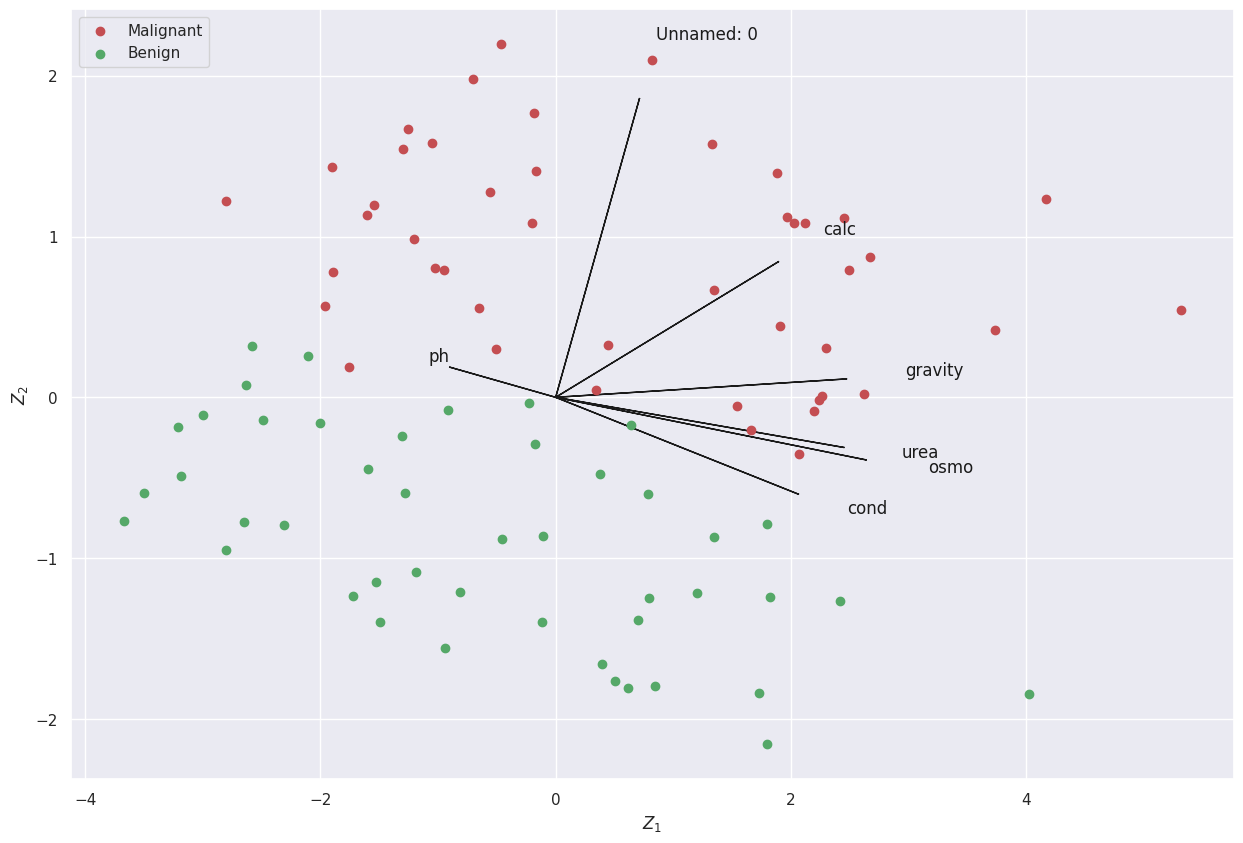

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [27]:
!pip install pca

In [28]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [29]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,0.616125,-1.810248,-1.844619,0.801606,1.056325
1,-0.118324,-1.397703,-0.371491,0.963778,-0.066742
2,-2.800652,-0.950452,1.301793,0.824433,0.028971
3,-1.722903,-1.237425,-1.055742,0.876275,0.073251
4,-3.669512,-0.766867,0.028397,0.986517,0.218918
...,...,...,...,...,...
85,1.878189,1.395374,-0.366006,0.030936,-0.338300
86,-0.184929,1.769048,1.178386,-0.234522,-0.087245
87,4.164580,1.233197,-0.615716,0.119495,1.027830
88,-1.256180,1.668646,-1.892625,-1.585717,0.156724


**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '5 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (53.8% expl.var)', ylabel='PC2 (16.4% expl.var)'>)

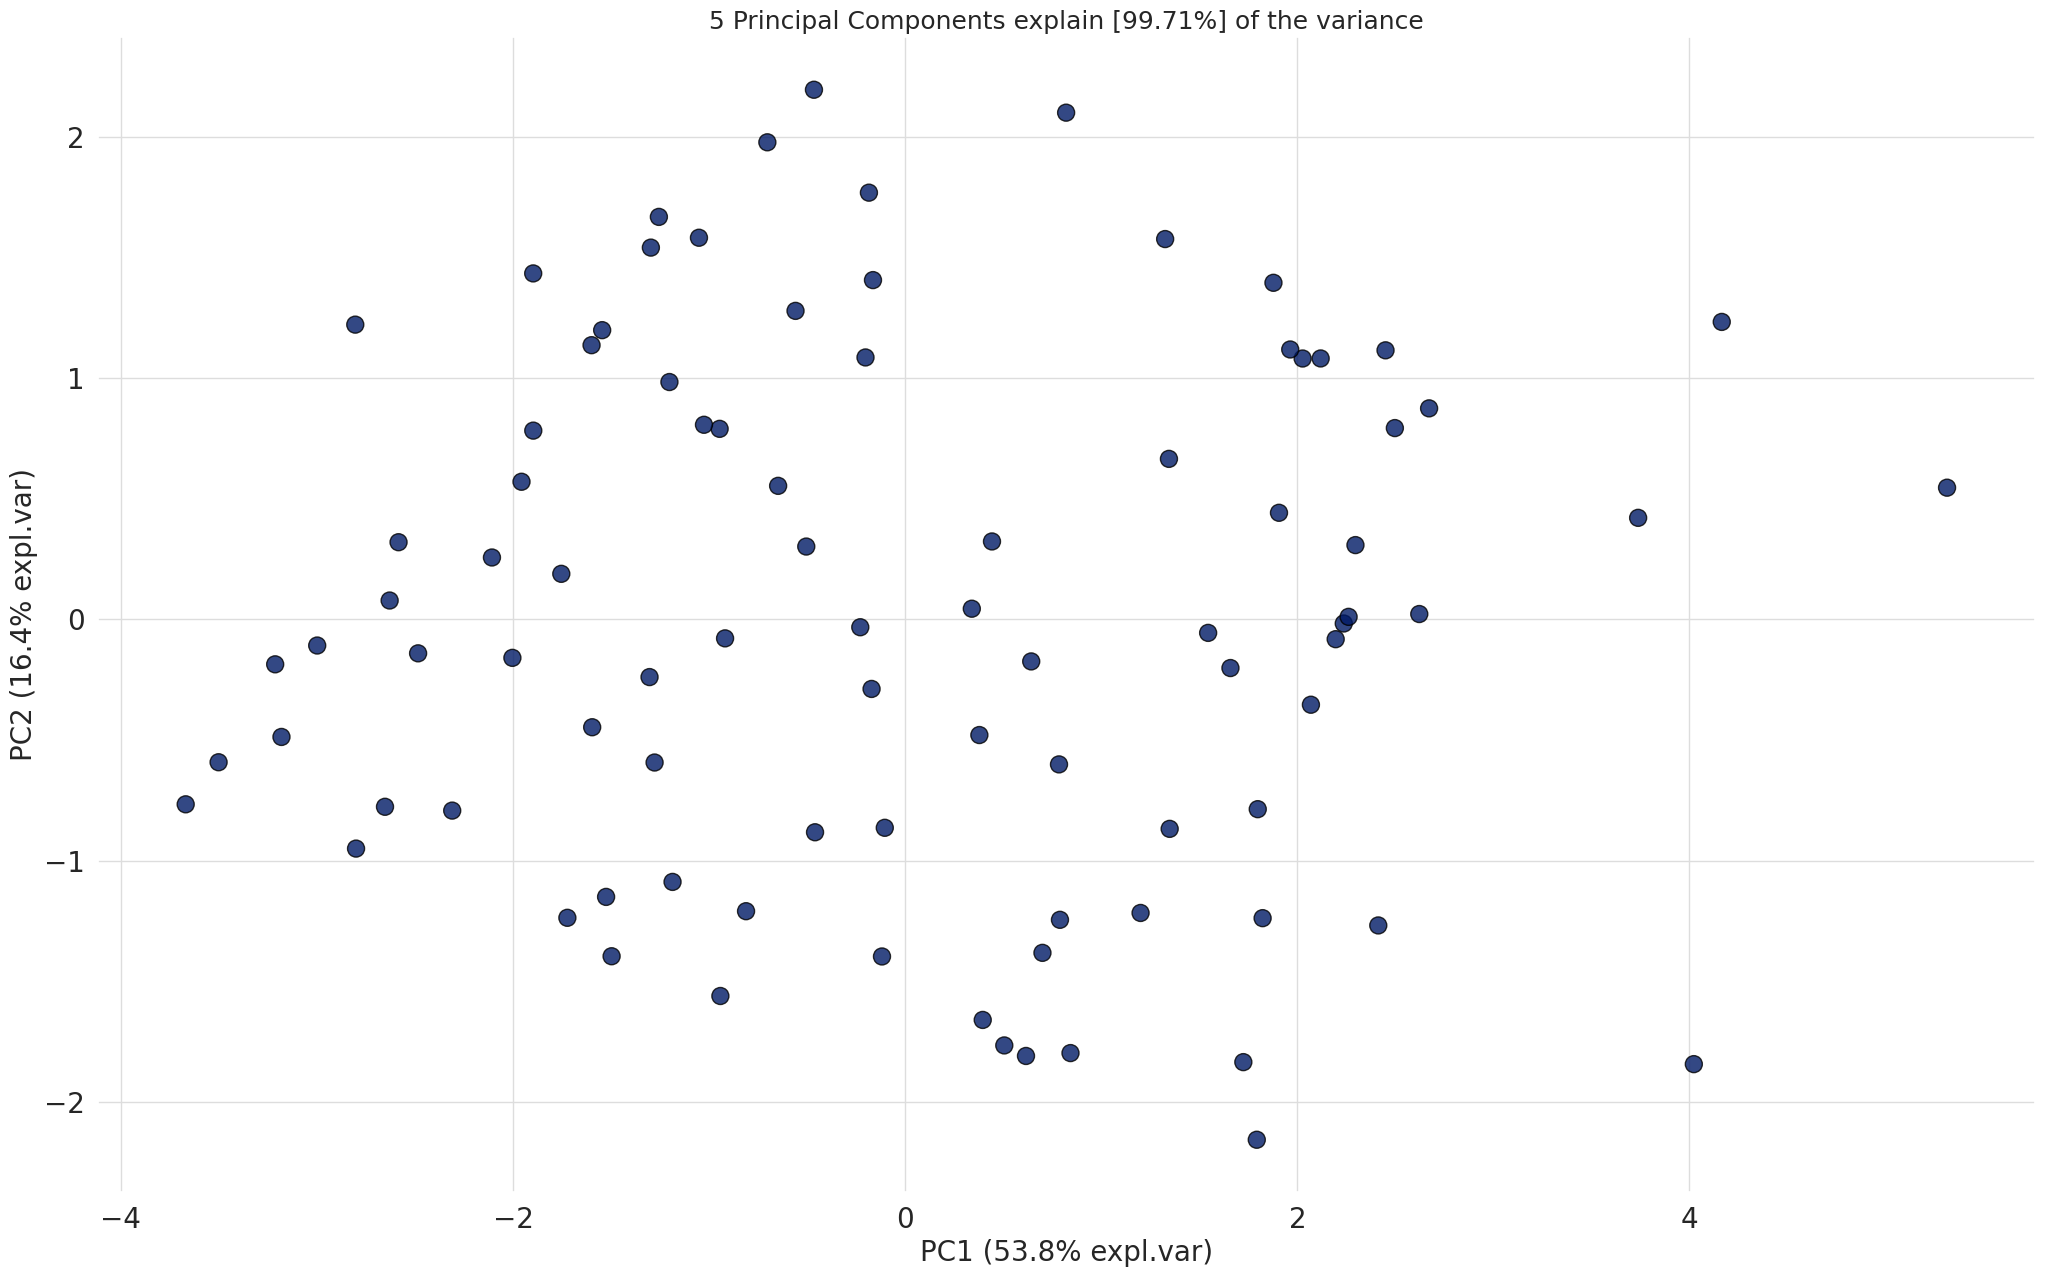

In [30]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [31]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5
Unnamed: 0,0.134008,0.845964,-0.019121,-0.428474,-0.000696
gravity,0.465258,0.052096,-0.101859,-0.240473,0.376914
ph,-0.169407,0.085413,0.920500,0.029073,0.333673
osmo,0.496703,-0.177302,0.104826,-0.098383,0.047416
cond,0.388251,-0.274252,0.337091,-0.383913,-0.614153
urea,0.460949,-0.141975,-0.045632,0.236961,0.487143
calc,0.356302,0.384094,0.123444,0.737915,-0.360356


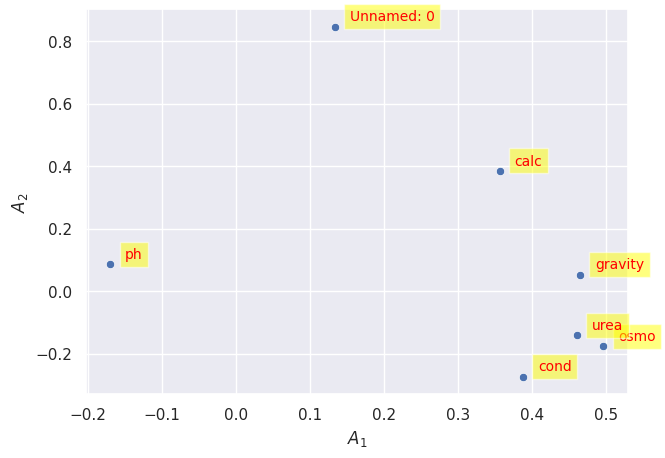

In [32]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

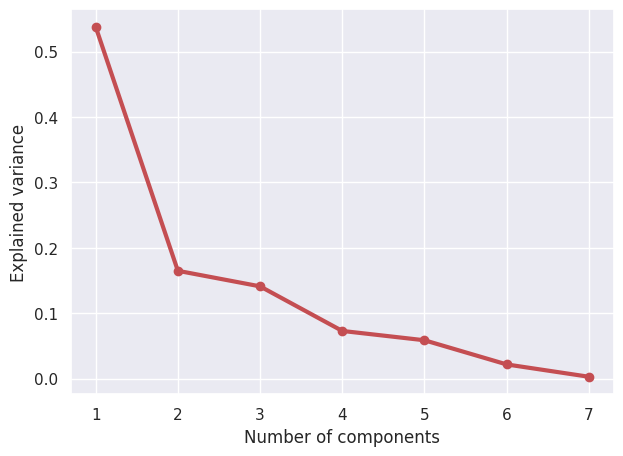

In [33]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

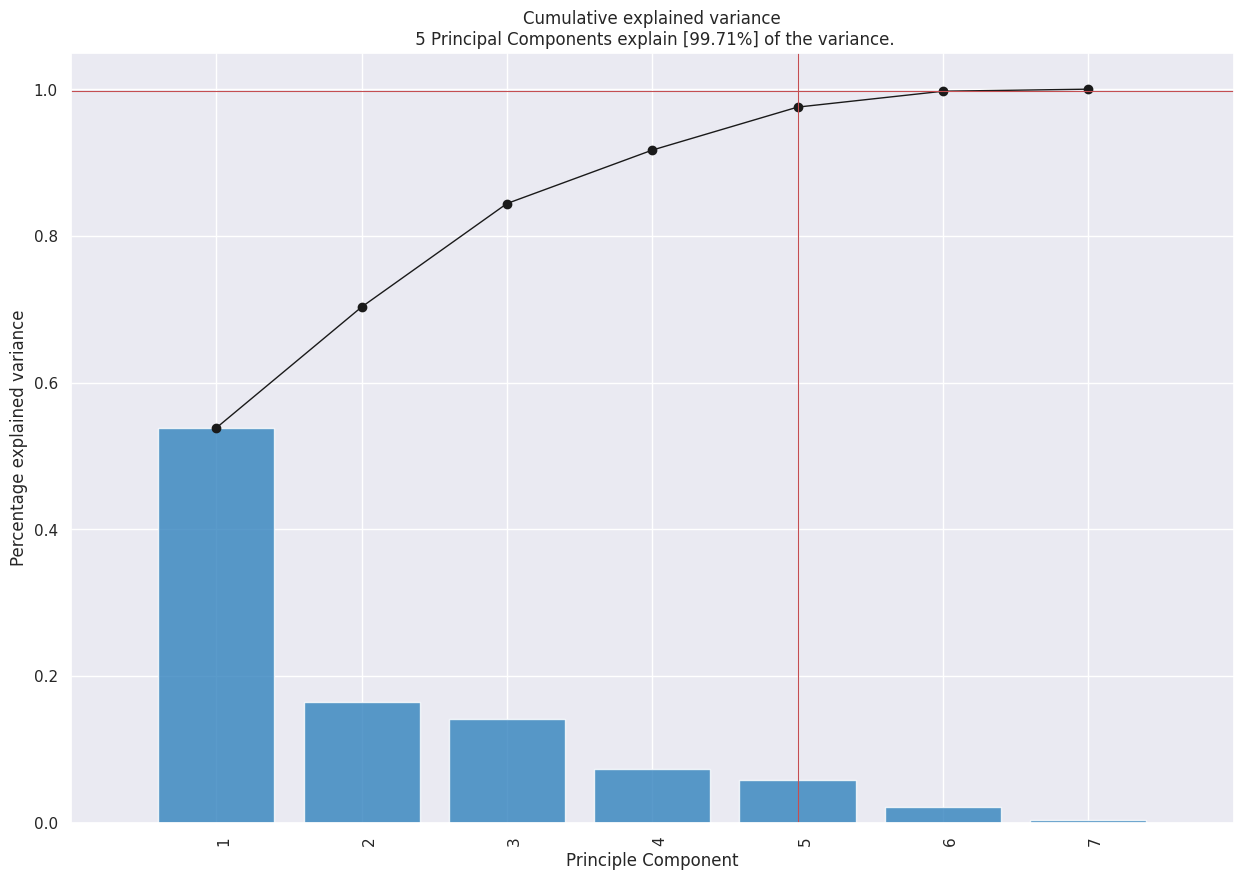

In [34]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '5 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (53.8% expl.var)', ylabel='PC2 (16.4% expl.var)'>)

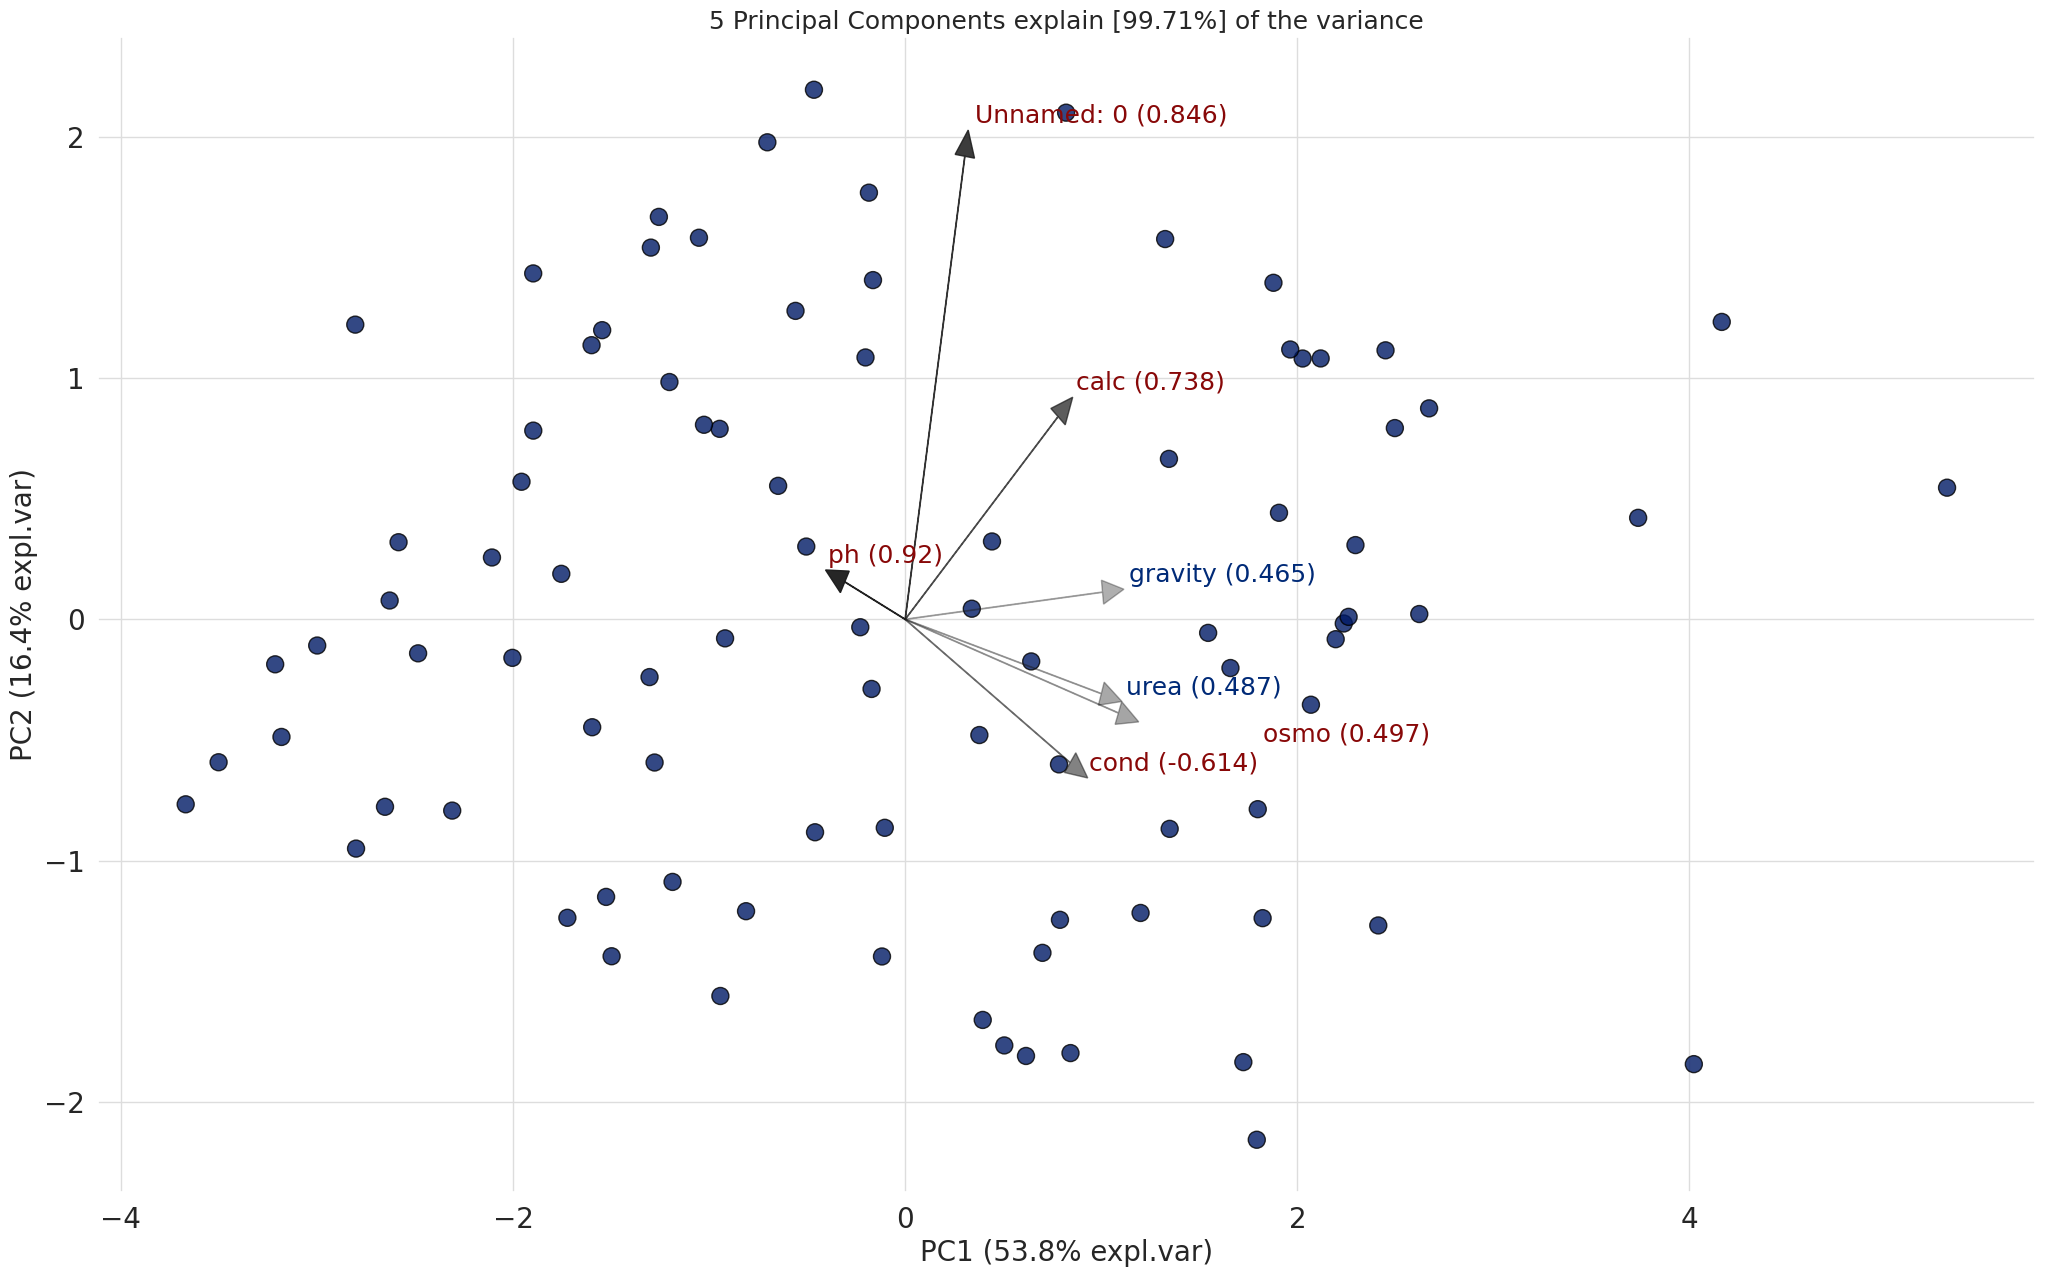

In [35]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '5 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (53.8% expl.var)', ylabel='PC2 (16.4% expl.var)', zlabel='PC3 (14.1% expl.var)'>)

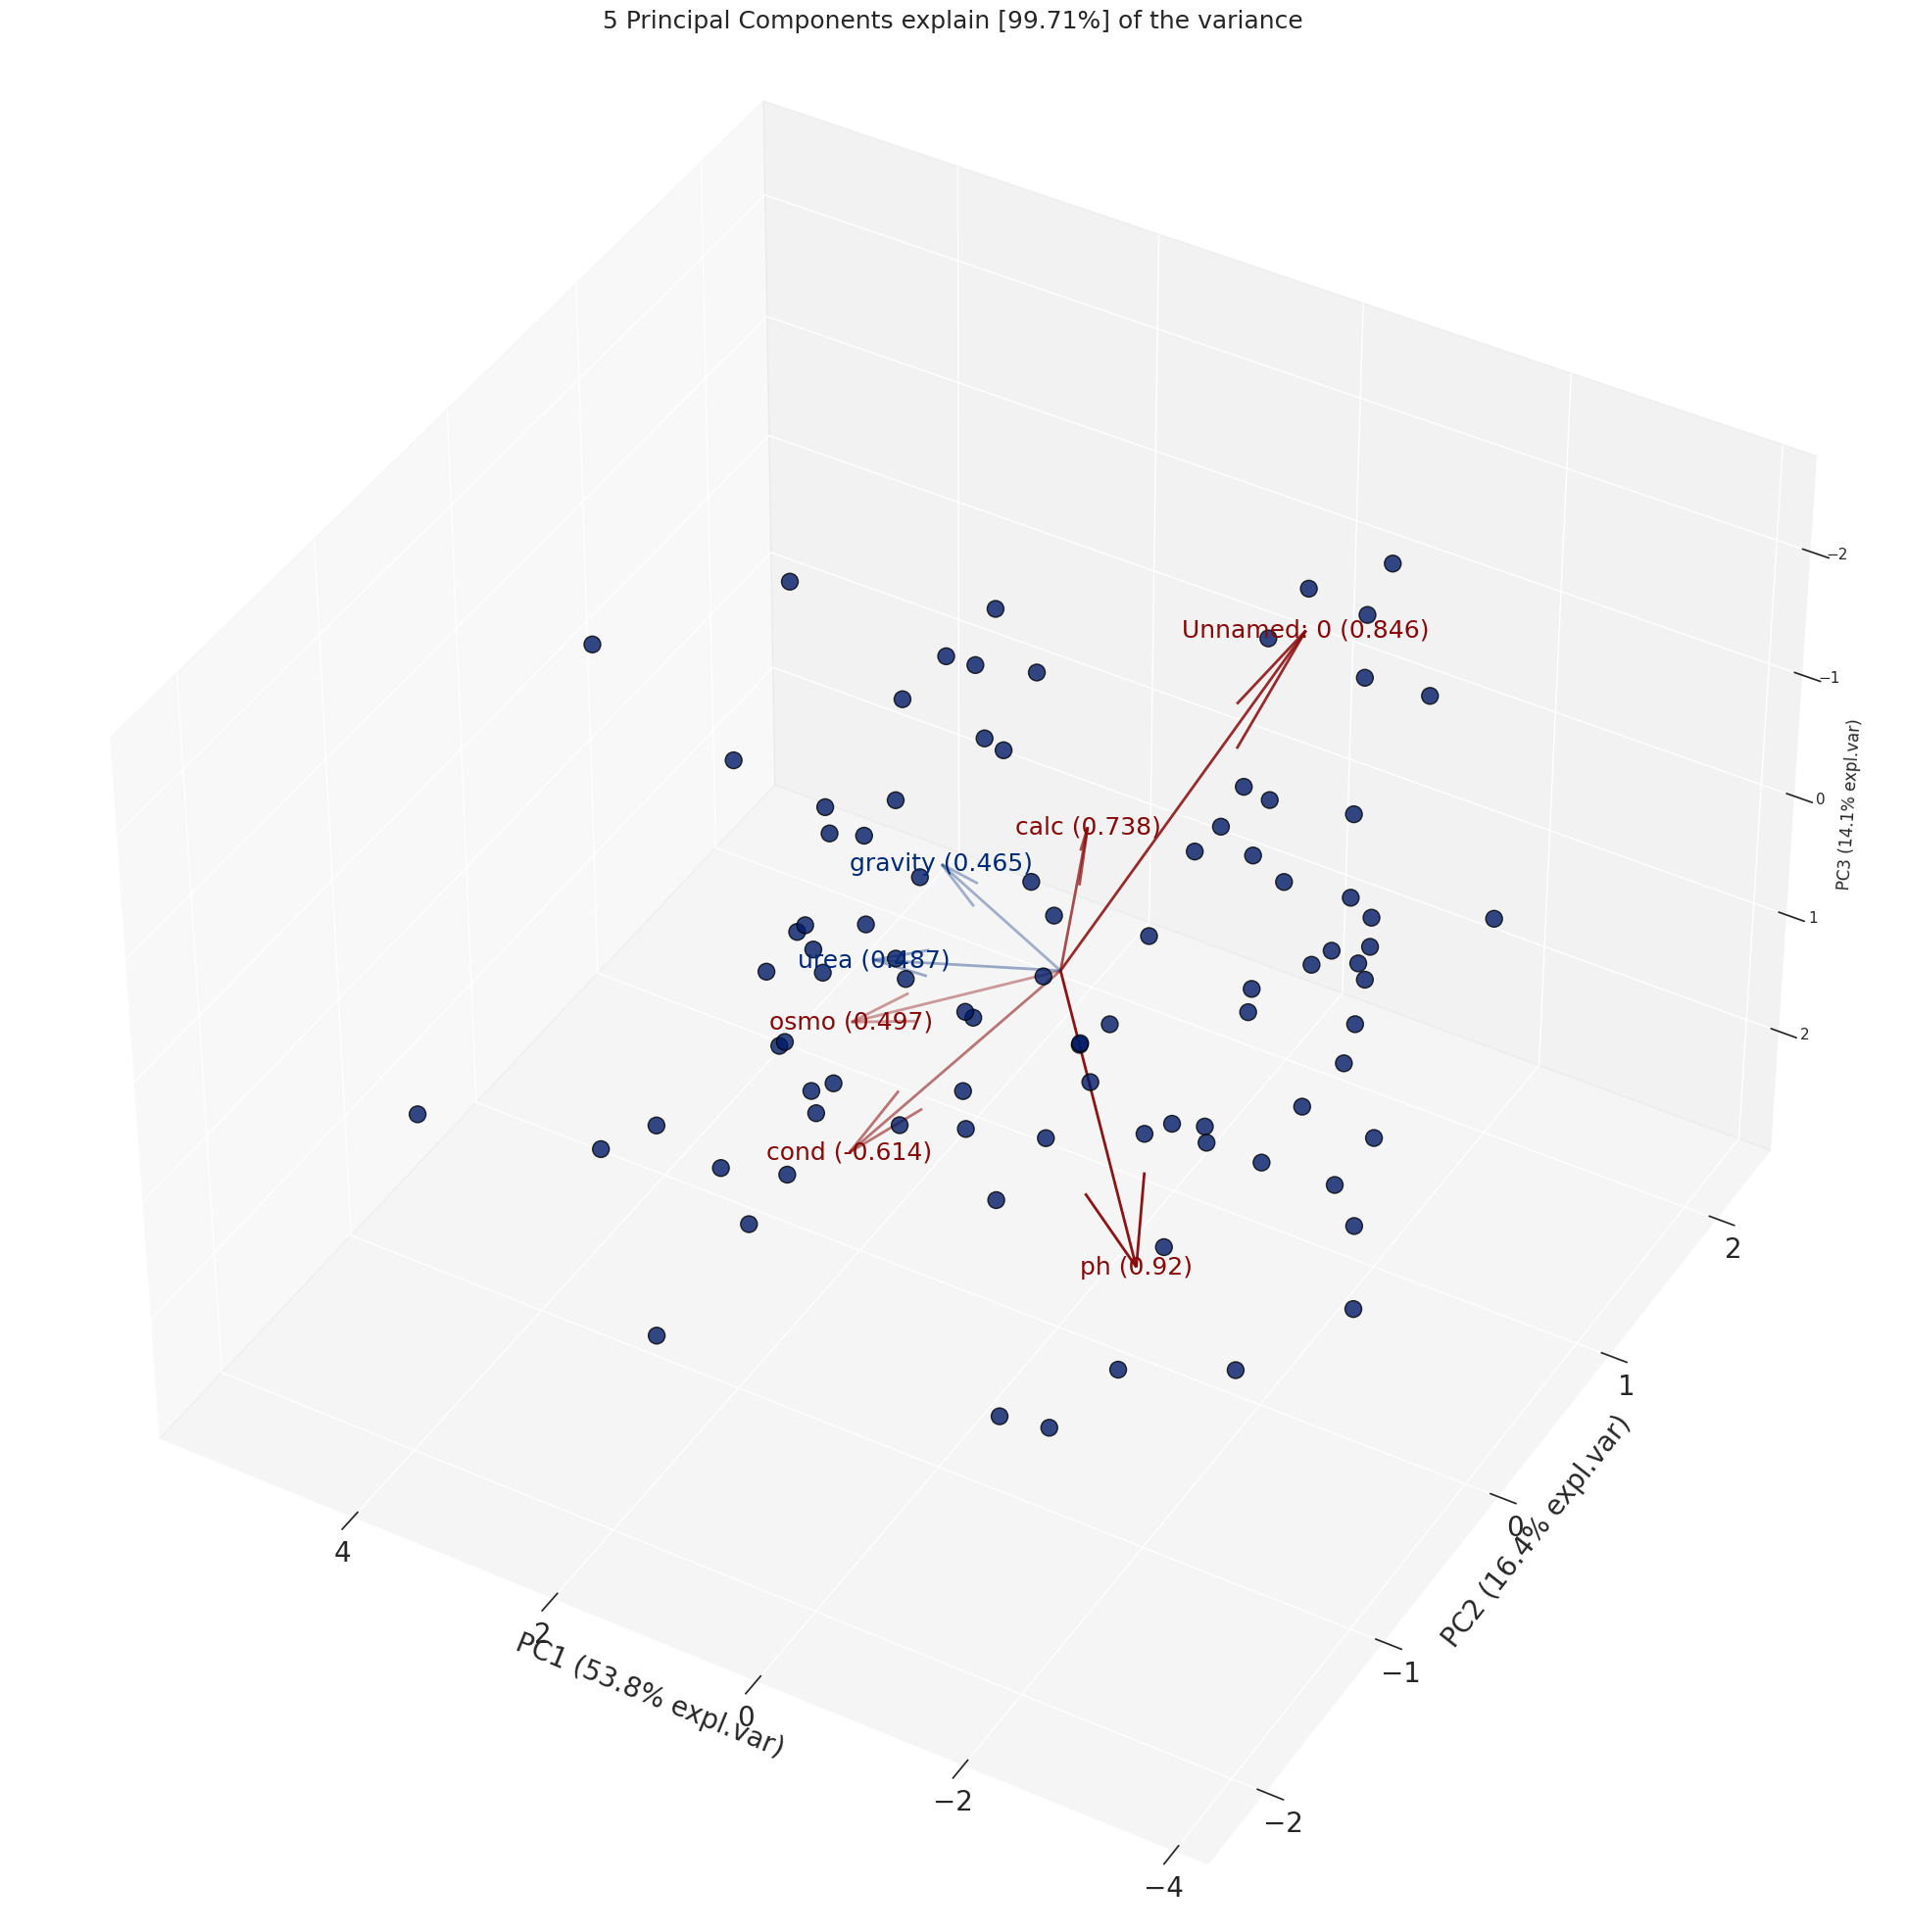

In [36]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [37]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [38]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 8)
Unseen Data For Predictions: (9, 8)


In [39]:
from pycaret.classification import *
clf = setup(data=data, target='target', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(81, 8)"
4,Transformed data shape,"(81, 8)"
5,Transformed train set shape,"(56, 8)"
6,Transformed test set shape,"(25, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


**Comparing All Models**

In [40]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.4400
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1410
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4530
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0840
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1920
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3460
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1600
xgboost,Extreme Gradient Boosting,0.9833,0.9833,0.9667,1.0000,0.9800,0.9667,0.9707,0.1630
ridge,Ridge Classifier,0.9800,0.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.1680
lda,Linear Discriminant Analysis,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.0800


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [41]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Create a Model

 **Logistic Regression**

In [42]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [43]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [45]:
pip install --upgrade pycaret

  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.0.0
    Uninstalling pycaret-3.0.0:
      Successfully uninstalled pycaret-3.0.0


In [46]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [47]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [48]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [49]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

**Evaluate model with K-nearest neighbour**

In [50]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [51]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [52]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate QDA Model**

In [53]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [54]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [55]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [56]:
clf_pca = setup(data=data, target='target', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(81, 8)"
4,Transformed data shape,"(81, 4)"
5,Transformed train set shape,"(56, 4)"
6,Transformed test set shape,"(25, 4)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


# **Comparing Models**

In [57]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.1330
ridge,Ridge Classifier,0.9800,0.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.2420
qda,Quadratic Discriminant Analysis,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.2890
lda,Linear Discriminant Analysis,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.2530
rf,Random Forest Classifier,0.9633,1.0000,0.9333,1.0000,0.9600,0.9282,0.9374,0.7760
knn,K Neighbors Classifier,0.9433,0.9778,0.9333,0.9667,0.9400,0.8897,0.9040,0.1540
svm,SVM - Linear Kernel,0.9433,0.0000,0.9333,0.9667,0.9400,0.8897,0.9040,0.2190
gbc,Gradient Boosting Classifier,0.9300,0.9667,0.9333,0.9500,0.9314,0.8615,0.8788,0.5470
et,Extra Trees Classifier,0.9300,1.0000,0.9000,0.9750,0.9157,0.8615,0.8821,0.7050
ada,Ada Boost Classifier,0.9233,0.9667,0.8833,0.9500,0.9100,0.8449,0.8540,0.5940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

# **Best model with PCA**

In [58]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [59]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Best Model**

In [60]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [61]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [62]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [63]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create K-nearest neighbour Model**

In [65]:
ridge_pca = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [66]:
tuned_ridge_pca = tune_model(ridge_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [67]:
tuned_ridge_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

# **Evaluate Model KNN**

In [68]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Quadratic Discriminant Analysis Model**

In [69]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [70]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [71]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [72]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [73]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,1.0000,0.3333,1.0000,0.5000,0.3333,0.4472
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [75]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [76]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
!pip install shap

In [78]:
import shap

In [79]:
!pip install pycaret[full]

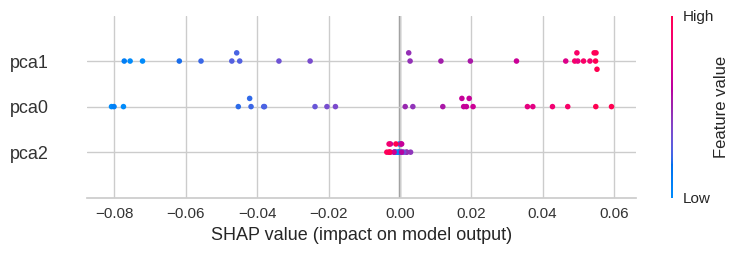

In [80]:
interpret_model(tuned_et_pca, plot='summary')

In [83]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

IndexError: ignored

In [84]:
interpret_model(tuned_et_pca, plot='reason')